/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Best parameters (grid search): {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'max_iter': 600}


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=20. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Best parameters (random search): {'max_iter': 600, 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 50), 'alpha': 0.1, 'activation': 'relu'}
Accuracy: 0.967
Precision: 0.9670547195903685
Recall: 0.966640394341605
F1-score: 0.9667795891640028
Confusion matrix:
 [[1349    1    4    1    0    2    4    2    6    4]
 [   0 1548    5    5    0    1    2    2    6    0]
 [   3    7 1378   12    3    0    4   11   12    0]
 [   2    0    1 1375    2   15    0    7    9    2]
 [   2    1    4    1 1323    0    9    7    0   29]
 [   7    0    4   35    4 1189    6    2    4    2]
 [   4    6    1    1    3   10 1308    0    4    2]
 [   2    4   21   13    2    0    0 1430    2    9]
 [   4    6    4   10    8    9    2    5 1313    4]
 [   2    4    1   26    8   11    3   14    5 1325]]


KeyError: ignored

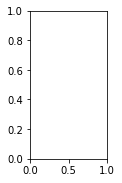

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Split the data into training and testing sets
n_samples = len(mnist.data)
train_data = mnist.data[:int(n_samples * 0.8)]
test_data = mnist.data[int(n_samples * 0.8):]
train_labels = mnist.target[:int(n_samples * 0.8)]
test_labels = mnist.target[int(n_samples * 0.8):]

# Define the ANN classifier
ann = MLPClassifier()

# Define the parameter grid to search
param_grid = {
    'hidden_layer_sizes': [(50,50)],
    'activation': ['relu', 'logistic', 'tanh'],
    'alpha': [0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [200, 400, 600]

}

# Perform a grid search over the parameter grid
grid_search = GridSearchCV(ann, param_grid=param_grid, cv=3)
grid_search.fit(train_data, train_labels)

# Print the best parameter combination found
print("Best parameters (grid search):", grid_search.best_params_)

# Perform a random search over the parameter grid
random_search = RandomizedSearchCV(ann, param_distributions=param_grid, n_iter=20, cv=3)
random_search.fit(train_data, train_labels)

# Print the best parameter combination found
print("Best parameters (random search):", random_search.best_params_)

# Define the ANN classifier with the best parameter combination
best_ann = MLPClassifier(**grid_search.best_params_)

# Train the ANN classifier on the training data
best_ann.fit(train_data, train_labels)

# Predict the labels of the test data
predicted_labels = best_ann.predict(test_data)

# Evaluate the performance of the ANN classifier
accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels, average='macro')
recall = recall_score(test_labels, predicted_labels, average='macro')
f1_score = f1_score(test_labels, predicted_labels, average='macro')
confusion_matrix = confusion_matrix(test_labels, predicted_labels)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)
print("Confusion matrix:\n", confusion_matrix)

# Visualize some of the test data and their predicted labels
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_data[i].reshape((28, 28)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Predicted label: %d" % predicted_labels[i])
plt.show()
